In [1]:
%matplotlib inline

In [3]:
from kid_readout.measurement.io import nc

In [10]:
save_directory = '/home/flanigan/temp/'

In [4]:
hp_high = nc.NCFile('/data/readout/2016-08-15_135248_magnetic_shield_high_4.nc')
hp_low = nc.NCFile('/data/readout/2016-08-15_131835_magnetic_shield_low_4.nc')
lp_high = nc.NCFile('/data/readout/2016-08-15_145317_magnetic_shield_high_4.nc')
lp_low = nc.NCFile('/data/readout/2016-08-15_142115_magnetic_shield_low_4.nc')

In [5]:
hp_ssa = ([hp_low.read(name) for name in hp_low.node_names() if name.startswith('SweepStreamArray')] +
          [hp_high.read(name) for name in hp_high.node_names() if name.startswith('SweepStreamArray')])
lp_ssa = ([lp_low.read(name) for name in lp_low.node_names() if name.startswith('SweepStreamArray')] +
          [lp_high.read(name) for name in lp_high.node_names() if name.startswith('SweepStreamArray')])

In [14]:
Qi_color = 'blue'
Qc_color = 'green'
Qi_marker = 'o'
Qc_marker = 's'

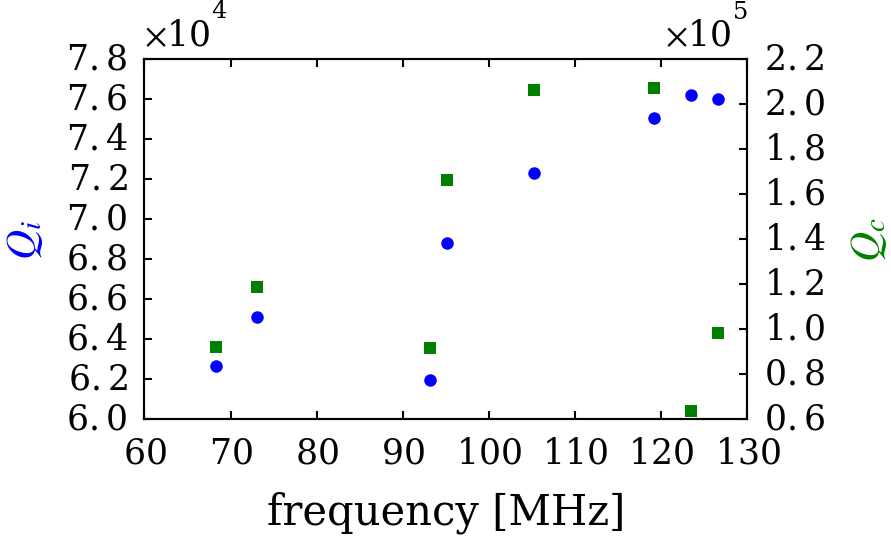

In [33]:
numbers = range(4)
f0_scale = 1e-6

fig, i_ax = plt.subplots()
c_ax = i_ax.twinx()
i_ax.set_xlabel('frequency [MHz]')
i_ax.set_ylabel('$Q_i$', color=Qi_color)
c_ax.set_ylabel('$Q_c$', color=Qc_color)

for number in numbers:
    lf41 = lp_ssa[0][number]
    i_ax.plot(f0_scale * lf41.resonator.f_0,
            lf41.resonator.Q_i,
            marker=Qi_marker, color=Qi_color, linestyle='none')
    c_ax.plot(f0_scale * lf41.resonator.f_0,
            lf41.resonator.Q_e_real,
            marker=Qc_marker, color=Qc_color, linestyle='none')
    hf41 = lp_ssa[0 + 4][number]
    i_ax.plot(f0_scale * hf41.resonator.f_0,
            hf41.resonator.Q_i,
            marker=Qi_marker, color=Qi_color, linestyle='none')
    c_ax.plot(f0_scale * hf41.resonator.f_0,
            hf41.resonator.Q_e_real,
            marker=Qc_marker, color=Qc_color, linestyle='none')

fig.savefig(save_directory + 'Qi_and_Qc_vs_f0.pdf', bbox_inches='tight')

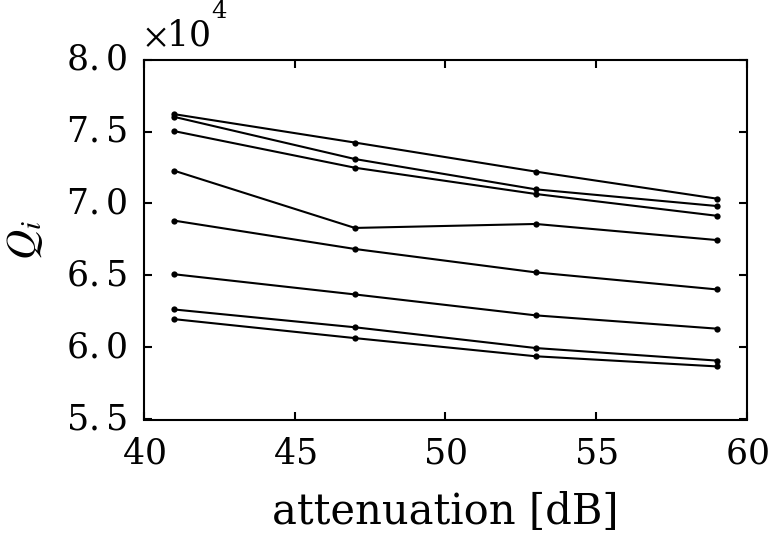

In [34]:
fig, ax = plt.subplots()
ax.set_xlabel('attenuation [dB]')
ax.set_ylabel('$Q_i$')

for index in range(4):
    ax.plot([ssa[index].stream.roach_state.dac_attenuation for ssa in lp_ssa[:4]],
            [ssa[index].resonator.Q_i for ssa in lp_ssa[:4]],
            '.-k')
    ax.plot([ssa[index].stream.roach_state.dac_attenuation for ssa in lp_ssa[4:]],
            [ssa[index].resonator.Q_i for ssa in lp_ssa[4:]],
            '.-k')
fig.savefig(save_directory + 'Qi_vs_attenuation_dB.pdf', bbox_inches='tight')

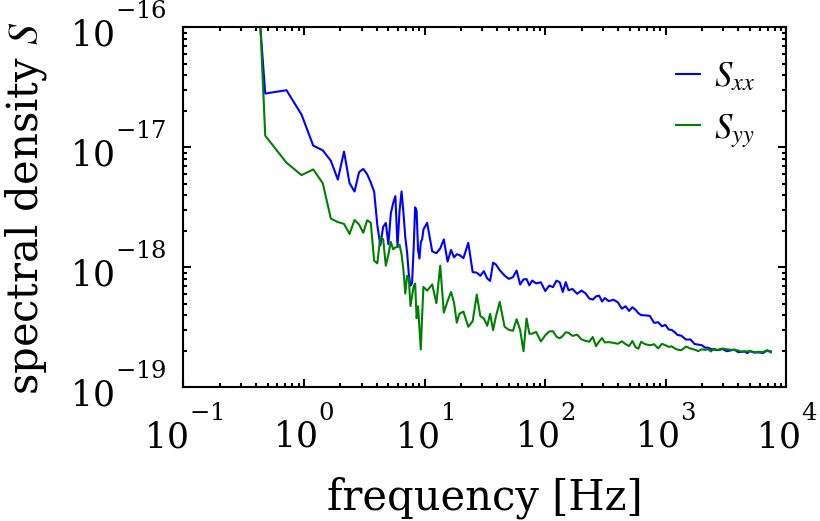

In [35]:
hp_attenuation_index = 2

fig, ax = plt.subplots()
ax.set_xscale('log')
ax.set_yscale('log')
ax.set_xlabel('frequency [Hz]')
ax.set_ylabel('spectral density $S$')

ssa = hp_ssa[hp_attenuation_index]
sss = ssa[2]
sss.set_S(window=plt.mlab.window_hanning)
ax.plot(sss.S_frequency,
        sss.S_xx,
        '-b', label='$S_{xx}$')
ax.plot(sss.S_frequency,
        sss.S_yy,
        '-g', label='$S_{yy}$')

ax.set_ylim(1e-19, 1e-16)
ax.legend(loc='best')
fig.savefig(save_directory + 'spectral_density.pdf', bbox_inches='tight')